In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

In [21]:
rhpass=pd.read_csv("filter_ftp_attack_linux.csv", parse_dates=['Time'])
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info
0,2011-11-16 16:36:55,10.10.10.5,10.10.10.20,FTP,86,Response: 220 (vsFTPd 1.1.3)
1,2011-11-16 16:36:55,10.10.10.5,10.10.10.20,FTP,76,Response: 500 OOPS:
2,2011-11-16 16:36:55,10.10.10.5,10.10.10.20,FTP,96,Response: vsf_sysutil_recv_peek: no data
3,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,FTP,86,Response: 220 (vsFTPd 1.1.3)
4,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,FTP,86,Response: 220 (vsFTPd 1.1.3)


In [22]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [23]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2011-11-16 16:36:55,10.10.10.5,10.10.10.20,FTP,86,Response: 220 (vsFTPd 1.1.3),Client
1,2011-11-16 16:36:55,10.10.10.5,10.10.10.20,FTP,76,Response: 500 OOPS:,Client
2,2011-11-16 16:36:55,10.10.10.5,10.10.10.20,FTP,96,Response: vsf_sysutil_recv_peek: no data,Client
3,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,FTP,86,Response: 220 (vsFTPd 1.1.3),Client
4,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,FTP,86,Response: 220 (vsFTPd 1.1.3),Client


In [24]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,86,2011-11-16 16:36:55,Response: 220 (vsFTPd 1.1.3)
1,76,2011-11-16 16:36:55,Response: 500 OOPS:
2,96,2011-11-16 16:36:55,Response: vsf_sysutil_recv_peek: no data
3,86,2011-11-16 16:37:09,Response: 220 (vsFTPd 1.1.3)
4,86,2011-11-16 16:37:09,Response: 220 (vsFTPd 1.1.3)


In [25]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-16 16:36:55,86,Response: 220 (vsFTPd 1.1.3)
2011-11-16 16:36:55,76,Response: 500 OOPS:
2011-11-16 16:36:55,96,Response: vsf_sysutil_recv_peek: no data
2011-11-16 16:37:09,86,Response: 220 (vsFTPd 1.1.3)
2011-11-16 16:37:09,86,Response: 220 (vsFTPd 1.1.3)


In [26]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-16 16:36:00,258
2011-11-16 16:37:00,1498
2011-11-16 16:38:00,836
2011-11-16 16:39:00,30232
2011-11-16 16:40:00,26957


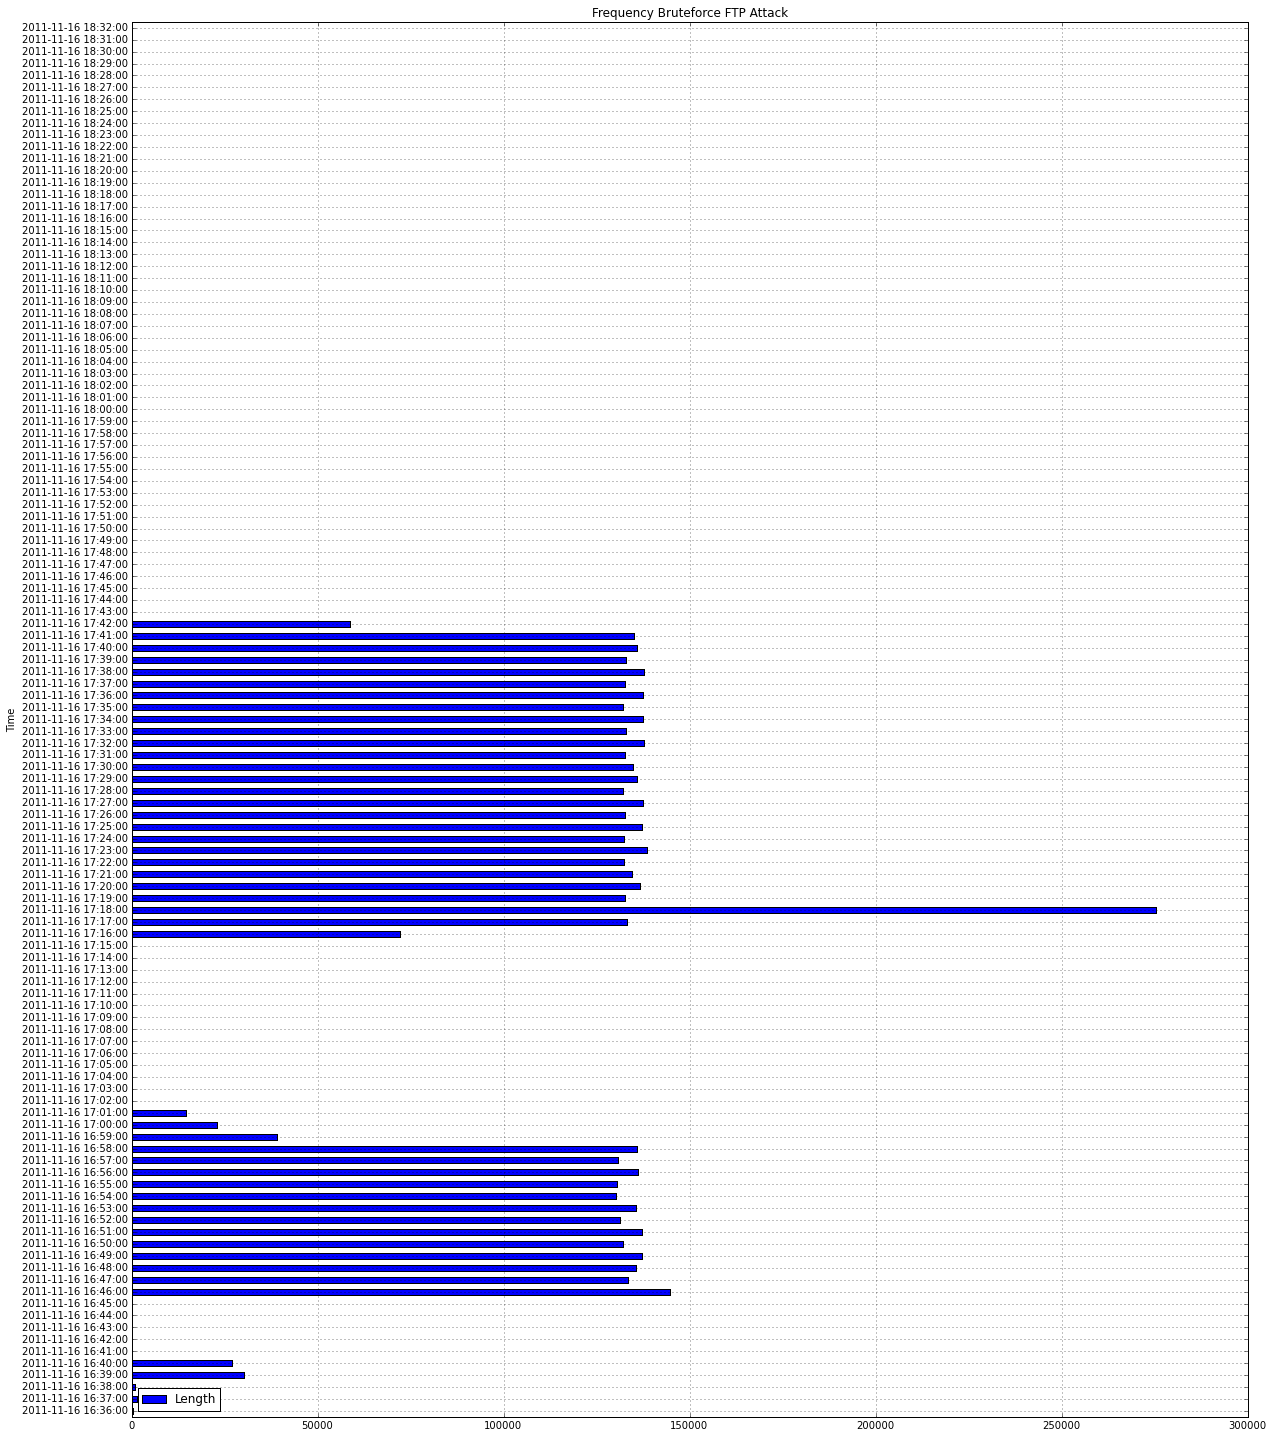

In [34]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Bruteforce FTP Attack",figsize=(20,25),legend=True)

In [28]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Bruteforce FTP Attack-linux time.png")

In [29]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2011-11-16 16:36:55,10.10.10.5,10.10.10.20,FTP,86,Response: 220 (vsFTPd 1.1.3),Client
1,2011-11-16 16:36:55,10.10.10.5,10.10.10.20,FTP,76,Response: 500 OOPS:,Client
2,2011-11-16 16:36:55,10.10.10.5,10.10.10.20,FTP,96,Response: vsf_sysutil_recv_peek: no data,Client
3,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,FTP,86,Response: 220 (vsFTPd 1.1.3),Client
4,2011-11-16 16:37:09,10.10.10.5,10.10.10.20,FTP,86,Response: 220 (vsFTPd 1.1.3),Client


In [30]:
category_group=rhpass.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source      Destination Protocol         
10.10.10.15 10.10.10.5  FTP       1422901
10.10.10.20 10.10.10.5  FTP         75546
10.10.10.5  10.10.10.15 FTP       3929965
            10.10.10.20 FTP        100347

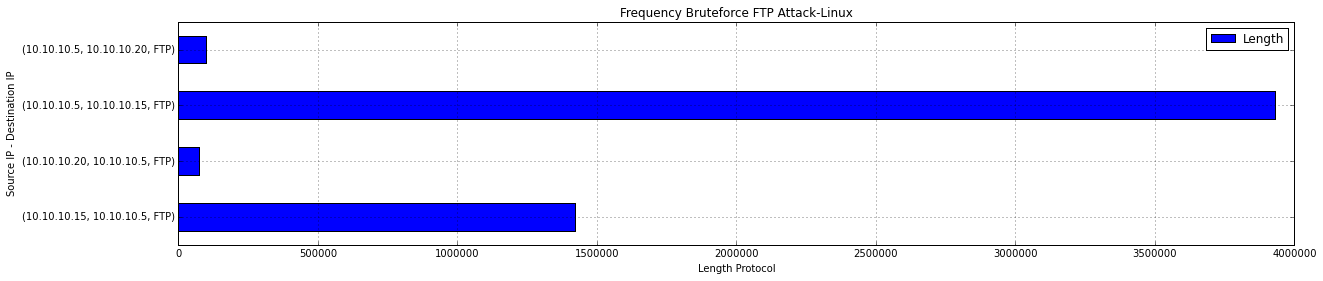

In [33]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Frequency Bruteforce FTP Attack-Linux",figsize=(20,4))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [35]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Bruteforce FTP Attack-Linux.png")